# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

print("Beginning Data Retrieval")     
print("-----------------------------")

record_counter=1
set_counter=1
city_data= []

#First make a query URL
#then get your requests to pull keys and values
#Put everything in a try to catch any errors, make except statement
#

for city in cities:
    
    query_url = f"{url}{city}&appid={weather_api_key}&units=imperial"

    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    # if record_counter==5:
    #     break

     # Validate API response has needed fields
    has_coord = "coord" in weather_json
    has_main = "main" in weather_json
    has_clouds = "clouds" in weather_json
    has_wind = "wind" in weather_json
    has_sys = "sys" in weather_json
    has_dt = "dt" in weather_json
    check_all = has_coord and has_main and has_clouds and has_wind and has_sys and has_dt
    if not check_all:
        print("City not found. Skipping...")
        continue

    print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
    lat=weather_json["coord"]["lat"]
    lon=weather_json["coord"]["lon"]
    max_temp=weather_json["main"]["temp_max"]
    humidity=weather_json["main"]["humidity"]
    cloudiness=weather_json["clouds"]["all"]
    wind_speed = weather_json["wind"]["speed"]
    country = weather_json["sys"]["country"]
    date = weather_json["dt"]

    data = {
        "City": city,
        "Lat": lat,
        "Lng": lon,
        "Max Temp": max_temp,
        "Humidity": humidity,
        "Cloudiness": cloudiness,
        "Wind Speed": wind_speed,
        "Country": country,
        "Date": date
        }

    city_data.append(data)
    

    if record_counter == 50: 
        set_counter += 1
        record_counter = 1
        time.sleep(60)
    record_counter+=1


   
    
    #break

# Build partial query URL
# print(city_data)


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | lorengau
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | klaksvik
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | okha
Processing Record 8 of Set 1 | martapura
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 1 | necochea
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | airai
City not found. Skipping...
Processing Record 13 of Set 1 | villarrica
Processing Record 14 of Set 1 | jalu
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | naze
Processing Record 18 of Set 1 | gimli
Processing Record 19 of Set 1 | vestmannaeyjar
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | evensk
Proce

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Separate data into columns
city = [i["City"] for i in city_data]
lat = [i["Lat"] for i in city_data]
lng = [i["Lng"] for i in city_data]
max_temp = [i["Max Temp"] for i in city_data]
humidity = [i["Humidity"] for i in city_data]
cloudiness = [i["Cloudiness"] for i in city_data]
wind_speed = [i["Wind Speed"] for i in city_data]
country = [i["Country"] for i in city_data]
date = [i["Date"] for i in city_data]

data = {
    "City": city,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

# Combine into a DataFrame
data_frame = pd.DataFrame(data=data)
data_frame['City_ID']=data_frame.index
data_frame.set_index('City_ID',inplace=True)
cities_csv=data_frame.to_csv('cities_csv.csv')
data_frame.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kaitangata,-46.2817,169.8464,68.94,72,18,5.95,NZ,1643585904
1,rikitea,-23.1203,-134.9692,77.11,71,100,5.77,PF,1643585904
2,lorengau,-2.0226,147.2712,79.72,83,100,12.48,PG,1643585839
3,busselton,-33.6500,115.3333,66.09,57,93,19.69,AU,1643585905
4,klaksvik,62.2266,-6.5890,36.52,54,99,40.24,FO,1643585905


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [6]:
def q25(x):
    return x.quantile(.25)
def q50(x):
    return x.quantile(.50)
def q75(x):
    return x.quantile(.75)        

agg_city_data=data_frame.drop(['Country','City'], axis=1)

agg_city_data=agg_city_data.agg(['count','mean','std','min',q25, q50, q75, 'max'])

agg_city_data=agg_city_data.rename({'q25': '25%', 'q50': '50%', 'q75':'75%'})

agg_city_data

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,18.430801,19.132855,50.602486,73.690090,57.726126,7.563964,1.643586e+09
std,33.522916,91.097131,31.161791,20.440046,39.999692,6.007828,2.743450e+02
min,-54.800000,-179.166700,-33.650000,7.000000,0.000000,0.000000,1.643585e+09
25%,-8.471000,-58.635000,29.650000,64.000000,16.500000,3.220000,1.643586e+09
50%,19.933300,25.950000,64.560000,77.000000,75.000000,5.770000,1.643586e+09
75%,48.092350,102.307750,75.580000,89.000000,99.000000,10.460000,1.643587e+09
max,78.218600,178.416700,92.710000,100.000000,100.000000,40.240000,1.643587e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data_no_hum=data_frame[data_frame['Humidity']<100]

city_data_no_hum2=city_data_no_hum.drop(['Country','City'], axis=1)

city_data_no_hum2=city_data_no_hum2.agg(['count','mean','std','min',q25, q50, q75, 'max'])

city_data_no_hum2=city_data_no_hum2.rename({'q25': '25%', 'q50': '50%', 'q75':'75%'})

city_data_no_hum2

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,5.330000e+02
mean,17.139229,15.771364,52.824540,72.604128,56.964353,7.779812,1.643586e+09
std,33.113128,90.521427,28.846149,20.131218,40.202503,6.016661,2.745280e+02
min,-54.800000,-179.166700,-29.650000,7.000000,0.000000,0.000000,1.643585e+09
25%,-8.897800,-59.783300,33.710000,63.000000,14.000000,3.440000,1.643586e+09
50%,18.685300,20.579100,65.640000,76.000000,74.000000,5.950000,1.643586e+09
75%,45.180500,97.200000,75.970000,88.000000,99.000000,10.670000,1.643587e+09
max,78.218600,178.416700,92.710000,99.000000,100.000000,40.240000,1.643587e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [8]:
to_drop=data_frame.index[data_frame['Humidity']>100]

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [9]:
clean_city_data=data_frame.drop(to_drop, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kaitangata,-46.2817,169.8464,68.94,72,18,5.95,NZ,1643585904
1,rikitea,-23.1203,-134.9692,77.11,71,100,5.77,PF,1643585904
2,lorengau,-2.0226,147.2712,79.72,83,100,12.48,PG,1643585839
3,busselton,-33.6500,115.3333,66.09,57,93,19.69,AU,1643585905
4,klaksvik,62.2266,-6.5890,36.52,54,99,40.24,FO,1643585905
...,...,...,...,...,...,...,...,...,...
550,mount gambier,-37.8333,140.7667,66.11,94,100,6.91,AU,1643586783
551,aklavik,68.2191,-135.0107,3.92,96,100,3.58,CA,1643586791
552,yokadouma,3.5167,15.0500,68.29,29,100,2.98,CM,1643586792


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

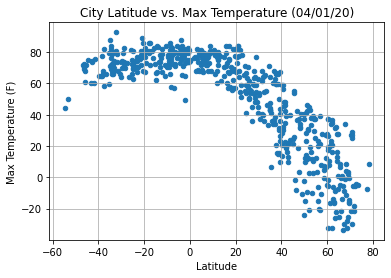

In [12]:
data_frame2=data_frame
data_frame2=data_frame2[['Lat','Max Temp']]

x_axis_lat=data_frame2['Lat'].to_list()
y_axis_temp=data_frame2['Max Temp'].to_list()

data_frame2.plot.scatter(x='Lat', y='Max Temp', grid=True)

plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig('Lat vs. Temp.png')

## Latitude vs. Temperature Plot

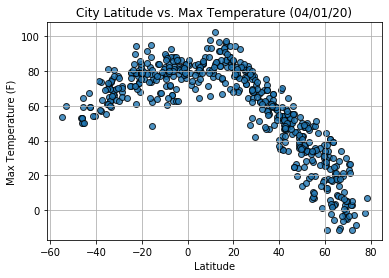

## Latitude vs. Humidity Plot

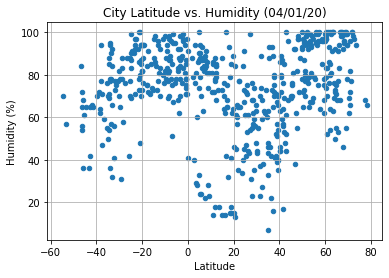

In [13]:
clean_city_data2=clean_city_data
clean_city_data2=clean_city_data2[['Lat','Humidity']]

x_axis_lat=clean_city_data2['Lat'].to_list()
y_axis_temp=clean_city_data2['Humidity'].to_list()

clean_city_data2.plot.scatter(x='Lat', y='Humidity', grid=True)

plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig('Lat vs. Humidity.png')

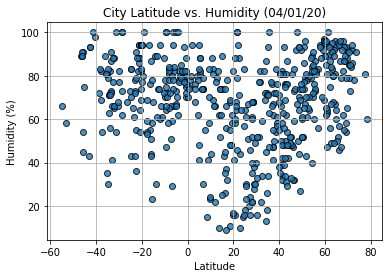

## Latitude vs. Cloudiness Plot

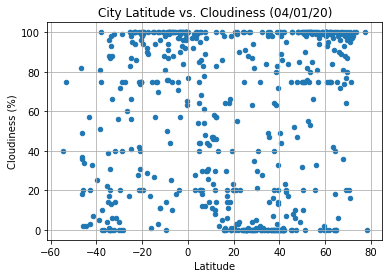

In [14]:
data_frame2=data_frame
data_frame3=data_frame2[['Lat','Cloudiness']]

x_axis_lat=data_frame3['Lat'].to_list()
y_axis_temp=data_frame3['Cloudiness'].to_list()

data_frame3.plot.scatter(x='Lat', y='Cloudiness', grid=True)

plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('Lat vs. Cloudiness.png')

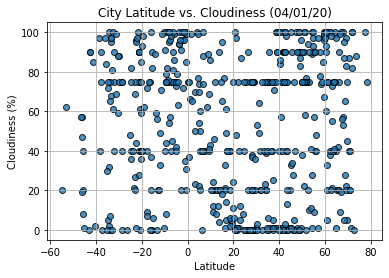

## Latitude vs. Wind Speed Plot

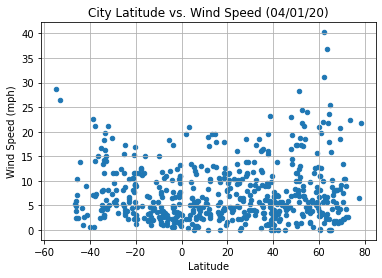

In [15]:
data_frame2=data_frame
data_frame4=data_frame2[['Lat','Wind Speed']]

x_axis_lat=data_frame4['Lat'].to_list()
y_axis_temp=data_frame4['Wind Speed'].to_list()

data_frame4.plot.scatter(x='Lat', y='Wind Speed', grid=True)

plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('Lat vs. Wind Speed.png')

## Linear Regression

In [18]:
data_frame_temp=data_frame
data_frame_temp_plot=data_frame_temp[['Lat','Max Temp']]

Nor_Hemi_data=data_frame_temp_plot[data_frame_temp_plot['Lat']>0]


In [22]:
x_values = Nor_Hemi_data['Lat']
y_values = Nor_Hemi_data['Max Temp']
linregress(x_values,y_values)

LinregressResult(slope=-1.327215309312264, intercept=89.35491234739075, rvalue=-0.8700174209120369, pvalue=1.5556756653018917e-113, stderr=0.03947530755986751, intercept_stderr=1.7262482965934354)

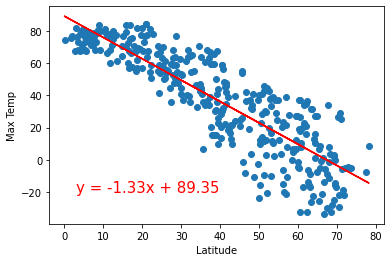

The r-value is: 0.7569303126904324


<Figure size 432x288 with 0 Axes>

In [32]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Nor Lat vs. Max Temp.png')


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


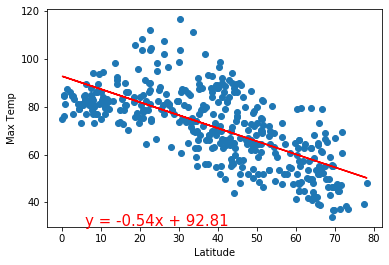

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [33]:
data_frame2=data_frame
data_frame_temp2=data_frame2[['Lat','Max Temp']]

So_Hemi_data=data_frame_temp2[data_frame_temp2['Lat']<0]

In [34]:
x_values1 = So_Hemi_data['Lat']
y_values1 = So_Hemi_data['Max Temp']
linregress(x_values1,y_values1)

LinregressResult(slope=0.19011356834843682, intercept=78.17158698577484, rvalue=0.35277675193198926, pvalue=5.974535031723891e-07, stderr=0.03677683500625882, intercept_stderr=0.8973577969686878)

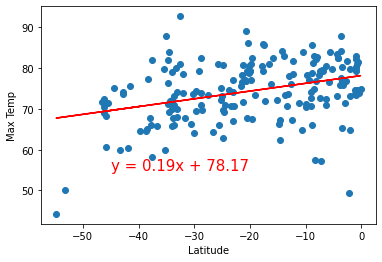

The r-value is: 0.12445143670368429


<Figure size 432x288 with 0 Axes>

In [53]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
regress_values = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values1,y_values1)
plt.plot(x_values1,regress_values,"r-")
plt.annotate(line_eq,(-45,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"The r-value is: {rvalue**2}")

plt.savefig('So Lat vs. Wind Speed.png')

The r-value is: 0.6082708688906918


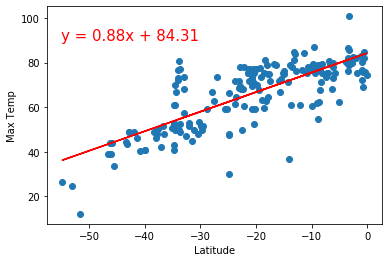

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

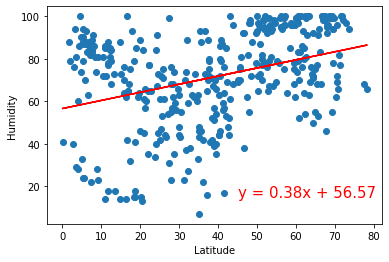

The r-value is: 0.1241655241299964


<Figure size 432x288 with 0 Axes>

In [54]:
data_frame2=data_frame
data_frame_No=data_frame2[['Lat','Humidity']]

No_Hemi_data2=data_frame_No[data_frame_No['Lat']>0]

x_values_hum = No_Hemi_data2['Lat']
y_values_hum = No_Hemi_data2['Humidity']
linregress(x_values_hum,y_values_hum)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_hum, y_values_hum)
regress_values_nor = x_values_hum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_hum,y_values_hum)
plt.plot(x_values_hum,regress_values_nor,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-value is: {rvalue**2}")

plt.savefig('Nor Lat vs. Humidity.png')

The r-value is: 0.000543987878808455


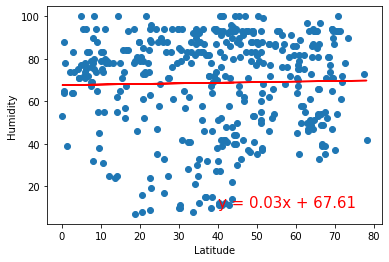

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

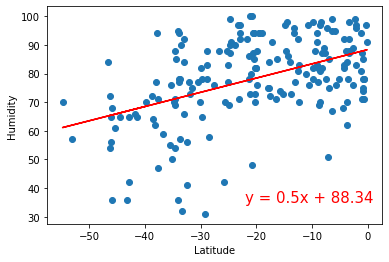

The r-value is: 0.2146494275827468


<Figure size 432x288 with 0 Axes>

In [60]:
data_frame2=data_frame
data_frame7=data_frame2[['Lat','Humidity']]

So_Hemi_data2=data_frame7[data_frame7['Lat']<0]

x_values_hum_so = So_Hemi_data2['Lat']
y_values_hum_2 = So_Hemi_data2['Humidity']
linregress(x_values_hum,y_values_hum)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_hum_so, y_values_hum_2)
regress_values2 = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_hum_so,y_values_hum_2)
plt.plot(x_values_hum_so,regress_values2,"r-")
plt.annotate(line_eq,(-22,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-value is: {rvalue**2}")

plt.savefig('So Lat vs. Humidity.png')


The r-value is: 0.014985174297345524


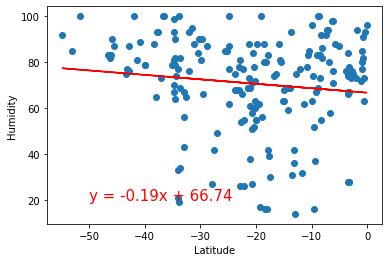

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

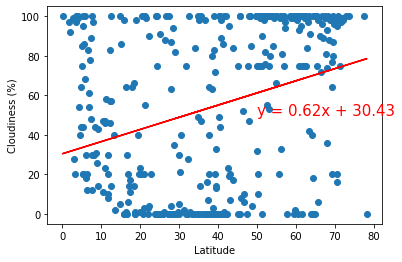

The r-value is: 0.09661818925282038


<Figure size 432x288 with 0 Axes>

In [63]:
data_frame2=data_frame
data_frame8=data_frame2[['Lat','Cloudiness']]

no_Hemi_data3=data_frame8[data_frame8['Lat']>0]

x_values_hum = no_Hemi_data3['Lat']
y_values_hum2 = no_Hemi_data3['Cloudiness']
linregress(x_values_hum,y_values_hum2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_hum, y_values_hum2)
regress_values3 = x_values_hum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_hum,y_values_hum2)
plt.plot(x_values_hum,regress_values3,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Nor Lat vs. Cloudiness.png')

The r-value is: 0.0020898727664228514


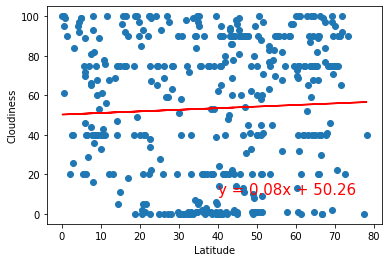

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

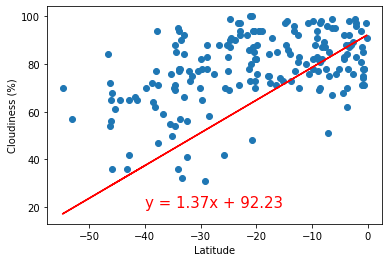

The r-value is: 0.26167822773128274


<Figure size 432x288 with 0 Axes>

In [66]:
data_frame2=data_frame
data_frame8=data_frame2[['Lat','Cloudiness']]

So_Hemi_data3=data_frame8[data_frame8['Lat']<0]

x_values_hum = So_Hemi_data3['Lat']
y_values_hum2 = So_Hemi_data3['Cloudiness']
linregress(x_values_hum,y_values_hum2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_hum, y_values_hum2)
regress_values3 = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_hum,y_values_hum)
plt.plot(x_values_hum,regress_values3,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
print(f"The r-value is: {rvalue**2}")
plt.savefig('So Lat vs. Cloudiness.png')

The r-value is: 0.0035263772085582894


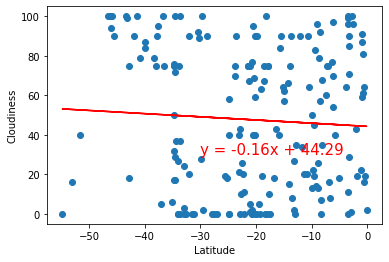

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

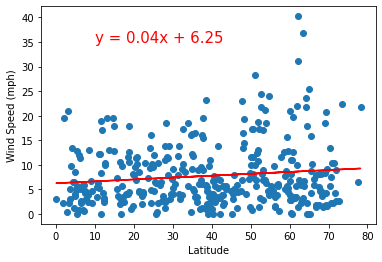

The r-value is: 0.015798015555547457


<Figure size 432x288 with 0 Axes>

In [68]:
data_frame2=data_frame
data_frame8=data_frame2[['Lat','Wind Speed']]

no_Hemi_data3=data_frame8[data_frame8['Lat']>0]

x_values_hum = no_Hemi_data3['Lat']
y_values_hum2 = no_Hemi_data3['Wind Speed']
linregress(x_values_hum,y_values_hum2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_hum, y_values_hum2)
regress_values3 = x_values_hum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_hum,y_values_hum2)
plt.plot(x_values_hum,regress_values3,"r-")
plt.annotate(line_eq,(10,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Nor Lat vs. Wind Speed (mph).png')

The r-value is: 0.04019723576144484


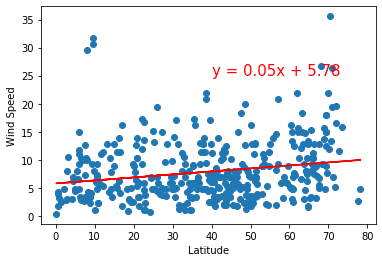

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

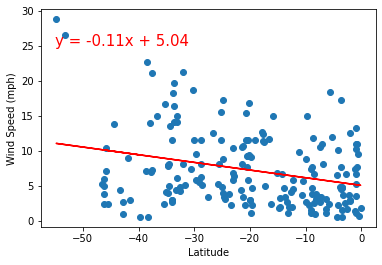

The r-value is: 0.08071933799517403


<Figure size 432x288 with 0 Axes>

In [75]:
data_frame2=data_frame
data_frame8=data_frame2[['Lat','Wind Speed']]

So_Hemi_data4=data_frame8[data_frame8['Lat']<0]

x_values_hum = So_Hemi_data4['Lat']
y_values_hum3 = So_Hemi_data4['Wind Speed']
linregress(x_values_hum,y_values_hum3)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_hum, y_values_hum3)
regress_values4 = x_values_hum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_hum,y_values_hum3)
plt.plot(x_values_hum,regress_values4,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
print(f"The r-value is: {rvalue**2}")
plt.savefig('So Lat vs. Wind Speed (mph).png')

The r-value is: 0.017128274759839232


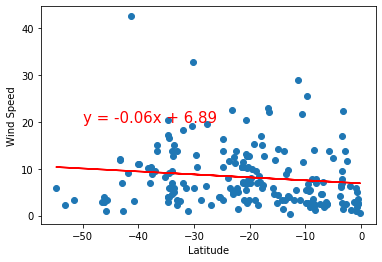